In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [325]:
# Creating the dataset with more samples
samples = 220
features, targets = make_classification(n_samples=samples, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=1)

print("Number of Samples : ", samples)

Number of Samples :  220


In [326]:
# Splitting into training and testing sets
train_size = int(0.8 * len(features))
X_train, X_test = features[:train_size], features[train_size:]
y_train, y_test = targets[:train_size], targets[train_size:]

In [327]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,1.115841,0.241150,1
1,0.242669,-0.953747,0
2,-0.498214,-0.993880,0
3,-0.060652,1.172289,1
4,2.054624,0.737805,1


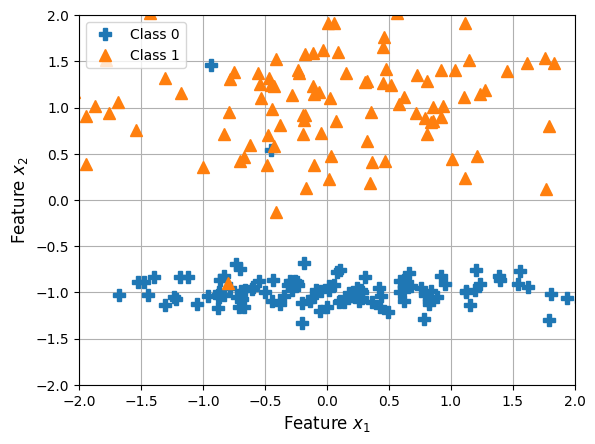

In [328]:
# Visualize the dataset
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker='P',
    markersize=8,
    linestyle='',
    label='Class 0'
)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker='^',
    markersize=8,
    linestyle='',
    label='Class 1'
)

plt.legend(loc=2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

In [329]:
# Create the perceptron
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, y_true):
        prediction = self.forward(x)
        error = y_true - prediction

        # Updating the weights
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

In [330]:
# Train the Model
def train(model, X_train, y_train, epochs):
    for epoch in range(epochs):
        error_count = 0
        for x, y in zip(X_train, y_train):
            error = model.update(x, y)
            error_count += abs(error)
        print(f"Epoch {epoch + 1} errors {error_count}")

In [331]:
# Create a perceptron and train it
epochs = 17
print("Number of Epochs : ", epochs)

ppn = Perceptron(num_features=2)
train(ppn, X_train, y_train, epochs=epochs)

# Compute accuracy
def compute_accuracy(model, features, targets):
    correct = sum(int(model.forward(x) == y) for x, y in zip(features, targets))
    return correct / len(targets)

train_acc = compute_accuracy(ppn, X_train, y_train)
test_acc = compute_accuracy(ppn, X_test, y_test)

print("\nTraining Accuracy:", format(train_acc, ".4f"))
print("Test Accuracy:", format(test_acc, ".4f"))

Number of Epochs :  17
Epoch 1 errors 6
Epoch 2 errors 6
Epoch 3 errors 6
Epoch 4 errors 5
Epoch 5 errors 3
Epoch 6 errors 4
Epoch 7 errors 6
Epoch 8 errors 6
Epoch 9 errors 5
Epoch 10 errors 5
Epoch 11 errors 5
Epoch 12 errors 4
Epoch 13 errors 5
Epoch 14 errors 4
Epoch 15 errors 6
Epoch 16 errors 4
Epoch 17 errors 4

Training Accuracy: 0.9886
Test Accuracy: 0.9545


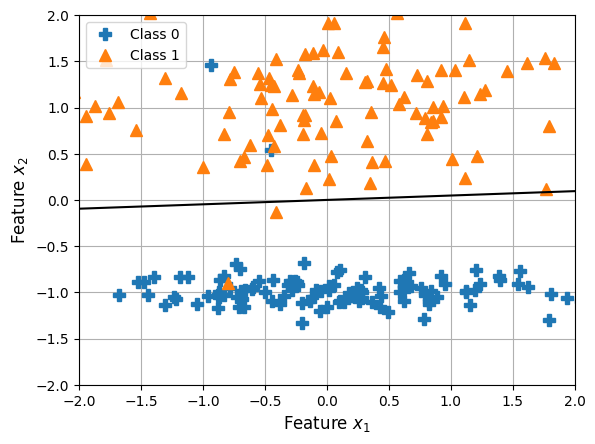

In [332]:
# Plot the Decision Boundary
def plot_boundary(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="P",
    markersize=8,
    linestyle="",
    label="Class 0",
)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="^",
    markersize=8,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()